In [38]:
import numpy as np
import pickle
from itertools import product
from scipy.cluster.hierarchy import linkage, fcluster
import random

In [4]:
grads = np.array(pickle.load(open(
    "./saved_exp_info/clients_grad/150CIFAR10_nbal_0.001_clustered_2_cosine_i1000_N20_lr0.05_B50_d1.0_p1.0_m10_0.pkl", 'rb')))


ipykernel_launcher:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [8]:
def get_matrix_similarity_from_grads(local_model_grads, distance_type):
    """return the similarity matrix where the distance chosen to
    compare two clients is set with `distance_type`"""

    n_clients = len(local_model_grads)

    metric_matrix = np.zeros((n_clients, n_clients))
    for i, j in product(range(n_clients), range(n_clients)):

        metric_matrix[i, j] = get_similarity(
            local_model_grads[i], local_model_grads[j], distance_type
        )

    return metric_matrix


def get_similarity(grad_1, grad_2, distance_type="L1"):

    if distance_type == "L1":

        norm = 0
        for g_1, g_2 in zip(grad_1, grad_2):
            norm += np.sum(np.abs(g_1 - g_2))
        return norm

    elif distance_type == "L2":
        norm = 0
        for g_1, g_2 in zip(grad_1, grad_2):
            norm += np.sum((g_1 - g_2) ** 2)
        return norm

    elif distance_type == "cosine":
        norm, norm_1, norm_2 = 0, 0, 0
        for i in range(len(grad_1)):
            norm += np.sum(grad_1[i] * grad_2[i])
            norm_1 += np.sum(grad_1[i] ** 2)
            norm_2 += np.sum(grad_2[i] ** 2)

        if norm_1 == 0.0 or norm_2 == 0.0:
            return 0.0
        else:
            norm /= np.sqrt(norm_1 * norm_2)

            return np.arccos(norm)


In [11]:
sim_matrix = get_matrix_similarity_from_grads(grads, "cosine")

In [12]:
print(sim_matrix)

[[0.         1.7141836  1.57156521 ... 1.56206378 1.73815879 0.15402653]
 [1.7141836  0.         1.41852929 ... 1.52114663 1.48479351 1.7239078 ]
 [1.57156521 1.41852929 0.         ... 0.26649607 1.72181337 1.5881323 ]
 ...
 [1.56206378 1.52114663 0.26649607 ... 0.         1.72297545 1.57613114]
 [1.73815879 1.48479351 1.72181337 ... 1.72297545 0.         1.72285979]
 [0.15402653 1.7239078  1.5881323  ... 1.57613114 1.72285979 0.        ]]


In [24]:
n_clusters = 10

linkage_matrix = linkage(sim_matrix, "ward")
clusters = fcluster(linkage_matrix, n_clusters, criterion="maxclust")

distri_clusters = np.zeros((n_clusters, 100))

for index in range(len(set(clusters))):
    for client in np.where(clusters == (index + 1))[0]:
        distri_clusters[index, client] = 1


clusters_client = np.zeros((n_clusters, 2), dtype=object)

for idx, cluster in enumerate(distri_clusters):
    clusters_client[idx][0] = [
        idx for idx in np.where(cluster != 0)[0]]
    clusters_client[idx][1] = sum(clusters_client[idx][0])
# 排序
clusters_client = clusters_client[clusters_client[:, 1].argsort()]

clusters_client = [cluster_c[0] for cluster_c in clusters_client]






[[5, 30, 33, 48, 54, 75, 91], [6, 16, 22, 27, 42, 46, 56, 61, 76], [4, 12, 17, 29, 71, 80, 87, 98], [8, 15, 35, 45, 52, 55, 62, 64, 86], [3, 9, 24, 36, 37, 44, 81, 83, 89, 94], [7, 11, 19, 39, 43, 47, 53, 69, 70, 79, 92], [13, 20, 23, 26, 28, 49, 50, 51, 59, 60, 67, 93], [0, 10, 14, 34, 41, 58, 73, 74, 82, 90, 99], [1, 31, 32, 40, 57, 63, 66, 68, 84, 95, 96], [2, 18, 21, 25, 38, 65, 72, 77, 78, 85, 88, 97]]


ipykernel_launcher:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


In [49]:
from copy import deepcopy
def get_rgb(num:int):
    res = []
    for i in range(3):
        res.append([int(s*255.0/num) for s in range(num)])
        np.random.shuffle(res[i])
    return np.array(res).T

clients_rgb = get_rgb(100)
print(clients_rgb)

[[252 112  58]
 [122 158 150]
 [193  99 137]
 [ 76  71 244]
 [112 122 226]
 [ 15   7 114]
 [ 71  63 191]
 [153 234 216]
 [ 25  48 158]
 [160 155  61]
 [137 119  63]
 [127  61 147]
 [ 96 198 163]
 [165 209   7]
 [181  66 247]
 [224  76 155]
 [183 160 239]
 [201  25  28]
 [ 68 214  12]
 [135 206  48]
 [209  73  68]
 [  2  43 232]
 [ 17  96 132]
 [ 33  38  22]
 [ 66  10 188]
 [ 94 252 234]
 [ 86  94  40]
 [ 12 132 252]
 [124  86  17]
 [211 201  76]
 [ 28 183 196]
 [ 22  12 224]
 [ 63 186 165]
 [114 135 211]
 [163 178 102]
 [229  89 117]
 [132 140 135]
 [242 142 204]
 [150 239 107]
 [170  84 219]
 [188   5   2]
 [ 51 127  73]
 [198  28 221]
 [ 53 109  96]
 [ 84 104 242]
 [ 99 244 170]
 [155 204 130]
 [  7 196  30]
 [ 40 226  66]
 [ 10 107 206]
 [145 216  43]
 [196  56 175]
 [249 137  45]
 [216 229 229]
 [ 30 124  56]
 [237 145 160]
 [107 193  94]
 [206  35  79]
 [142 147  38]
 [204 242  51]
 [ 81   2 173]
 [173 249  10]
 [102 232 201]
 [ 45  81 145]
 [147  68  71]
 [104 221 140]
 [ 56  40 

In [60]:

clusters_color = []
for cluster_a in clusters_client:
    clusters_color.append(np.mean([clients_rgb[idx] for idx in cluster_a], axis=0, dtype=int))

print(clusters_color)


[array([ 68, 139, 109]), array([128, 127, 168]), array([137, 136, 110]), array([158, 141, 121]), array([146,  90, 150]), array([133, 132, 119]), array([137, 118,  95]), array([120, 138, 114]), array([ 97,  77, 117]), array([119, 160, 149])]


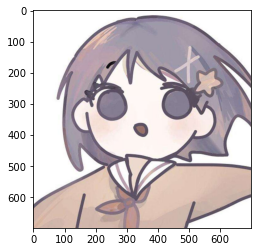

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('t.jpg')
imgplot = plt.imshow(img)

print(img)

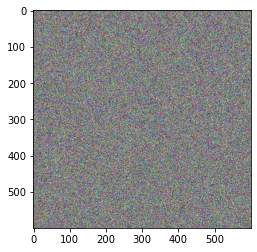

In [48]:

rgb_map = np.zeros((600, 600,3), dtype=int)

for i in range(600):
    for j in range(600):
        for k in range(3):
            rgb_map[i][j][k] = random.randint(0,255)

plt.imshow(rgb_map)
plt.savefig("filename.png")

In [ ]:
def g_all_distri(linkage_matrixs, n_cluster):

    all_distri = []

    for linkage_matrix in linkage_matrixs:
        clusters = fcluster(linkage_matrix, n_cluster,
                            criterion="maxclust")  # 按最大簇个数聚类
        distri_clusters = np.zeros((n_cluster, 100))

        for index in range(n_cluster):
            for client in np.where(clusters == (index + 1))[0]:
                distri_clusters[index, client] = 1
        all_distri.append(deepcopy(distri_clusters))
    return all_distri


def g_all_clusters_clients(all_distri):

    all_clusters_clients = []

    for i, clusters_i in enumerate(all_distri):
        clusters_client = np.zeros((len(clusters_i), 2), dtype=object)
        for idx, cluster in enumerate(clusters_i):
            clusters_client[idx][0] = [
                idx for idx in np.where(cluster != 0)[0]]
            clusters_client[idx][1] = sum(clusters_client[idx][0])
        # 排序
        clusters_client = clusters_client[clusters_client[:, 1].argsort()]
        res = [cluc[0] for cluc in clusters_client]
        all_clusters_clients.append(res)
    return all_clusters_clients


n_c = 10  # 12类可能最好


all_clusters_clients = g_all_clusters_clients(
    g_all_distri(linkage_matrixs, n_c))[1:]


def get_rgb(num: int):
    res = []
    for i in range(3):
        res.append([int(s*255.0/num) for s in range(num)])
        np.random.shuffle(res[i])
    return np.array(res).T


clients_rgb = get_rgb(100)

clusters_colors = []
for clusters_clients_i in all_clusters_clients:
    clusters_color_i = []
    for cluster_a in clusters_clients_i:
        clusters_color_i.append(
            np.mean([clients_rgb[idx] for idx in cluster_a], axis=0, dtype=int))
    clusters_colors.append(clusters_color_i)

clusters_colors = np.array(clusters_colors)

colors = np.zeros((600, 999, 3), dtype=int)
for i in range(999):
    for j in range(600):
        colors[j][i] = clusters_colors[i][int(j/60)]


plt.imshow(colors)
plt.show()
